### Import Libraries

In [ ]:
from tensorflow.keras.layers import Input,Lambda,Dense,Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

### Test and Train Path

In [ ]:
IMAGE_SIZE = [224,224]

train_path = '/content/drive/MyDrive/Colab Notebooks/Naruto vs Sasuke/dataset/train'
test_path = '/content/drive/MyDrive/Colab Notebooks/Naruto vs Sasuke/dataset/test'

### Creating ResNet50 Model

In [ ]:
resnet = ResNet50(input_shape = IMAGE_SIZE+[3],weights='imagenet',include_top=False)

In [ ]:
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

### Setup Trainable Layer to False

In [ ]:
for layer in resnet.layers:
  layer.trainable= False

In [ ]:
folder = glob('/content/drive/MyDrive/Colab Notebooks/Naruto vs Sasuke/dataset/train/*')

In [ ]:
folder

['/content/drive/MyDrive/Colab Notebooks/Naruto vs Sasuke/dataset/train/naruto',
 '/content/drive/MyDrive/Colab Notebooks/Naruto vs Sasuke/dataset/train/sasuke']

### Inserting Input ans Output Layer

In [ ]:
x = Flatten()(resnet.output)

In [ ]:
prediction = Dense(1,activation='sigmoid')(x)

model = Model(inputs=resnet.input , outputs=prediction)

In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [ ]:
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy'],
)

### Data Augumentation

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Naruto vs Sasuke/dataset/train',
                             target_size = (224,224),
                             batch_size = 32,
                             class_mode='binary')

Found 70 images belonging to 2 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Naruto vs Sasuke/dataset/test',
                             target_size = (224,224),
                             batch_size = 32,
                             class_mode='binary')

Found 30 images belonging to 2 classes.


### Training Model

In [ ]:
r = model.fit_generator(
    training_set,
    validation_data = test_set,
    epochs = 100,
    steps_per_epoch = len(training_set),
    validation_steps = len(test_set)
)

<ipython-input-61-929866611b01>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/100
3/3 [==============================] - 45s 15s/step - loss: 1.5652 - accuracy: 0.5857 - val_loss: 1.0396 - val_accuracy: 0.5000
Epoch 2/100
3/3 [==============================] - 3s 836ms/step - loss: 1.4840 - accuracy: 0.4714 - val_loss: 0.7822 - val_accuracy: 0.6333
Epoch 3/100
3/3 [==============================] - 3s 1s/step - loss: 0.7276 - accuracy: 0.6143 - val_loss: 0.6252 - val_accuracy: 0.6333
Epoch 4/100
3/3 [==============================] - 3s 826ms/step - loss: 0.6665 - accuracy: 0.6429 - val_loss: 0.6646 - val_accuracy: 0.7000
Epoch 5/100
3/3 [==============================] - 3s 843ms/step - loss: 0.6722 - accuracy: 0.6571 - val_loss: 0.4600 - val_accuracy: 0.7000
Epoch 6/100
3/3 [==============================] - 3s 1s/step - loss: 0.5905 - accuracy: 0.6286 - val_loss: 0.3685 - val_accuracy: 0.8333
Epoch 7/100
3/3 [==============================] - 3s 1s/step - loss: 0.5364 - accuracy: 0.6857 - val_loss: 0.3647 - val_accuracy: 0.8333
Epoch 8/100
3/3 [======

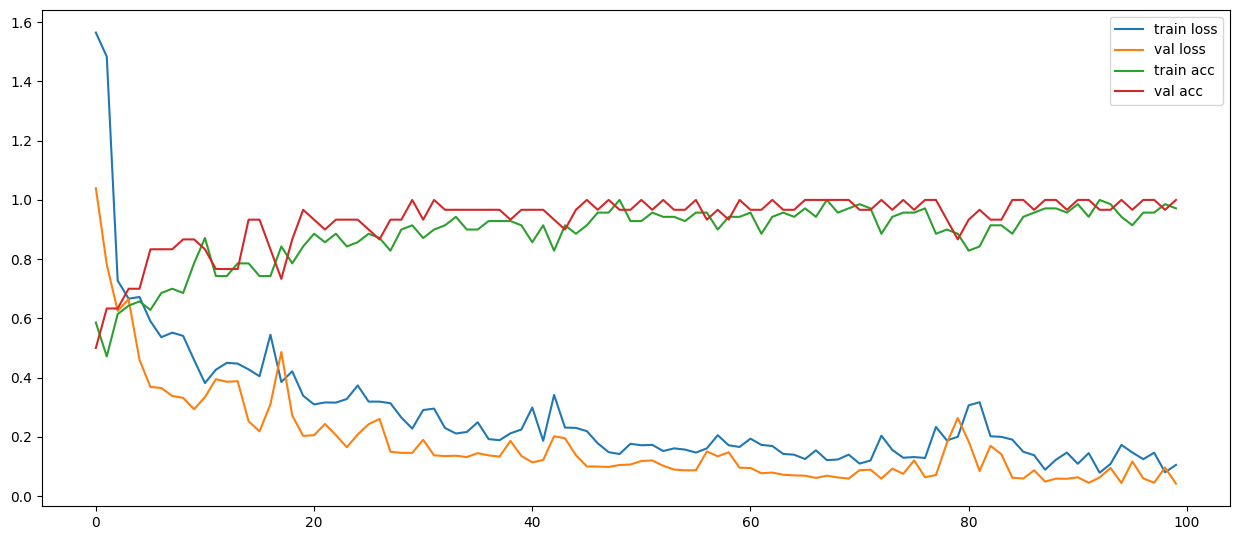

In [ ]:
plt.rcParams["figure.figsize"] = [12.50, 5.50]
plt.rcParams["figure.autolayout"] = True
figure, axis = plt.subplots(1, 1)

plt.plot(r.history['loss'],label='train loss')
plt.plot(r.history['val_loss'],label='val loss')

plt.plot(r.history['accuracy'],label='train acc')
plt.plot(r.history['val_accuracy'],label='val acc')
plt.legend()
plt.show()

### Saving Model

In [ ]:
from tensorflow.keras.models import load_model
model.save('/content/drive/MyDrive/Colab Notebooks/Naruto vs Sasuke/model_resnet.h5')